# Regresión logística

In [ ]:
library(tidyverse)
library(broom)
library(modelr)
library(purrr)
library(caret)
library(glmnet)
library("pROC")
set.seed(55)

In [2]:
path_proc =  "..\\data\\processed\\"
path_results = "..\\data\\results\\"

## Datasets

In [ ]:
# Datos
dev = read_csv(paste0(path_proc,"data_bal_dummy_dev.csv"))
test = read_csv(paste0(path_proc,"data_bal_dummy_test.csv"))

train1 = read_csv(paste0(path_proc,"data_bal_dummy_train1.csv"))
train2 = read_csv(paste0(path_proc,"data_bal_dummy_train2.csv"))
train3 = read_csv(paste0(path_proc,"data_bal_dummy_train3.csv"))
train4 = read_csv(paste0(path_proc,"data_bal_dummy_train4.csv"))
train5 = read_csv(paste0(path_proc,"data_bal_dummy_train5.csv"))

val1 = read_csv(paste0(path_proc,"data_bal_dummy_val1.csv"))
val2 = read_csv(paste0(path_proc,"data_bal_dummy_val2.csv"))
val3 = read_csv(paste0(path_proc,"data_bal_dummy_val3.csv"))
val4 = read_csv(paste0(path_proc,"data_bal_dummy_val4.csv"))
val5 = read_csv(paste0(path_proc,"data_bal_dummy_val5.csv"))


# Se quita BMI y id
dev$BMI = NULL
test$BMI = NULL
train1$BMI = NULL
train2$BMI = NULL
train3$BMI = NULL
train4$BMI = NULL
train5$BMI = NULL
val1$BMI = NULL
val2$BMI = NULL
val3$BMI = NULL
val4$BMI = NULL
val5$BMI = NULL

In [35]:
# Vector con el target
dev_target = dev$target
# Matriz con los regresores
dev_mtx = model.matrix(target~., data = dev[,c(2:57)])

## Búsqueda de lambda para regularización Lasso

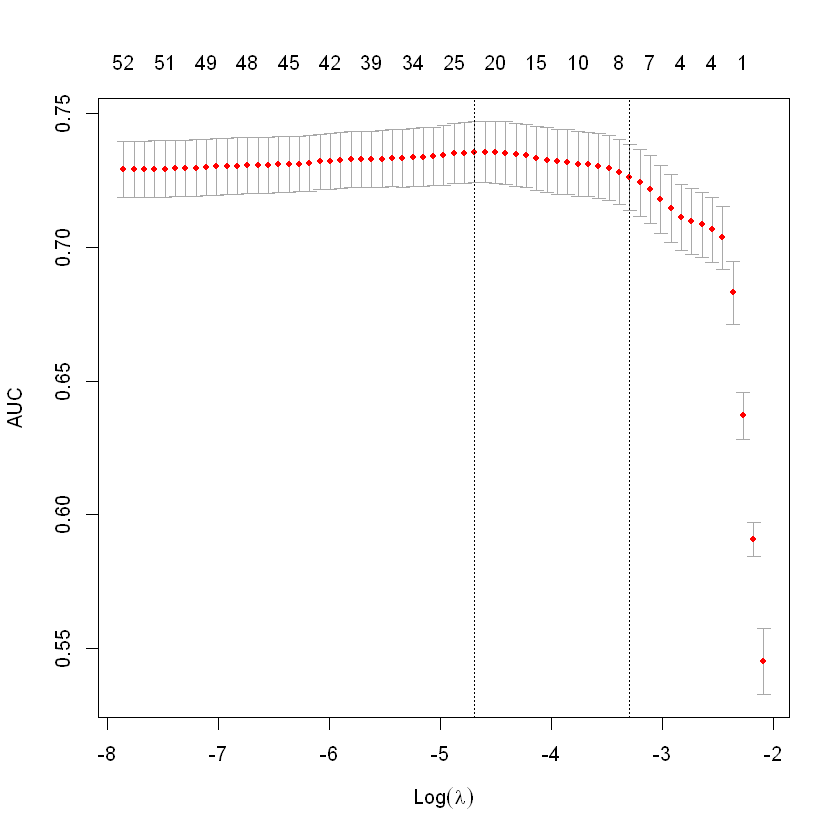

In [36]:
# Búsquda de lambda con CV
lasso_cv=cv.glmnet(x=dev_mtx, y=dev_target, alpha=1, standardize = T,  family = "binomial", type.measure="auc")
# Plot
plot(lasso_cv)

In [37]:
# Selección lambda óptimo
lasso_lambda_opt = lasso_cv$lambda.min

# Entrenamiento modelo óptimo
lasso_opt = glmnet(x=dev_mtx, # Matriz de regresores
                 y=dev_target, #Vector de la variable a predecir
                 family = "binomial",
                 alpha=1, # Indicador del tipo de regularizacion
                 standardize = TRUE,  # Estandarizamos
                 lambda = lasso_lambda_opt)

# Salida estandar
lasso_opt


Call:  glmnet(x = dev_mtx, y = dev_target, family = "binomial", alpha = 1,      lambda = lasso_lambda_opt, standardize = TRUE) 

  Df  %Dev   Lambda
1 21 14.48 0.009176

In [38]:
# Variables que permanencen
tmp_coeffs = coef(lasso_opt)
data.frame(name = tmp_coeffs@Dimnames[[1]][tmp_coeffs@i + 1], coefficient = tmp_coeffs@x)

name,coefficient
(Intercept),7.243316e-01
AGE_P,-2.222168e-02
CIGSDAY,1.163006e-02
MOD,-2.520915e-05
ALC,-1.515147e-02
ASISLEEP,-8.688617e-02
HYPMED2,-2.046015e-01
HRTEV,2.054474e-01
STREV,2.873366e-01
AASSTILL,5.748473e-02


In [52]:
# Selección de variables
dev = dev %>% select(AGE_P,CIGSDAY,MOD,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)
test = test %>% select(AGE_P,CIGSDAY,MOD,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)

train1 = train1 %>% select(AGE_P,CIGSDAY,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)
train2 = train2 %>% select(AGE_P,CIGSDAY,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)
train3 = train3 %>% select(AGE_P,CIGSDAY,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)
train4 = train4 %>% select(AGE_P,CIGSDAY,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)
train5 = train5 %>% select(AGE_P,CIGSDAY,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)

val1 = val1 %>% select(AGE_P,CIGSDAY,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)
val2 = val2 %>% select(AGE_P,CIGSDAY,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)
val3 = val3 %>% select(AGE_P,CIGSDAY,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)
val4 = val4 %>% select(AGE_P,CIGSDAY,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)
val5 = val5 %>% select(AGE_P,CIGSDAY,ALC,ASISLEEP,HYPMED2,HRTEV,STREV,AASSTILL,ULCYR,AHAYFYR,SINYR,PAINECK,PAINLB,PAINFACE,FLA1AR,APOX,SEX_2,RACERPI2_4,RACERPI2_6,R_MARITL_2,target)

# Vector con el target
train1_target = train1$target
train2_target = train2$target
train3_target = train3$target
train4_target = train4$target
train5_target = train5$target

val1_target = val1$target
val2_target = val2$target
val3_target = val3$target
val4_target = val4$target
val5_target = val5$target

test_target = test$target

In [5]:
# Fórmula de los modelos
logit_formula = formulas(.response = ~target,
                         model_todos = ~ .,
                         model_sujeto = ~ AGE_P + SEX_2 + RACERPI2_4 + RACERPI2_6 + R_MARITL_2,
                         model_habitos = ~ CIGSDAY + ALC + ASISLEEP,
                         model_dolor = ~ PAINECK + PAINLB + PAINFACE + FLA1AR,
                         model_med = ~ HYPMED2,
                         model_enf_ant = ~ HRTEV + STREV + AASSTILL + ULCYR + AHAYFYR + SINYR + APOX,
                         model_sujeto_habitos = ~ AGE_P + SEX_2 + RACERPI2_4 + RACERPI2_6 + R_MARITL_2 + CIGSDAY + ALC + ASISLEEP,
                         model_sujeto_dolor = ~ AGE_P + SEX_2 + RACERPI2_4 + RACERPI2_6 + R_MARITL_2 + PAINECK + PAINLB + PAINFACE + FLA1AR,
                         model_sujeto_med = ~ AGE_P + SEX_2 + RACERPI2_4 + RACERPI2_6 + R_MARITL_2 + HYPMED2,
                         model_sujeto_enf_ant = ~ AGE_P + SEX_2 + RACERPI2_4 + RACERPI2_6 + R_MARITL_2 + HRTEV + STREV + AASSTILL + ULCYR + AHAYFYR + SINYR + APOX   
                          )

In [6]:
# Generación de modelos
modelos_train = tibble(logit_formula) %>%
          mutate(model = names(logit_formula),
          expression = paste(logit_formula),
          mod = map(logit_formula, ~glm(.,family = 'binomial', data = dev))) 

In [42]:
# Las medidas de evaluación para cada modelo
modelos_train = modelos_train %>% mutate(glance = map(mod, broom::glance))
# Se filtran medidas de evaluacion de interes
modelos_train %>% unnest(glance, .drop = TRUE) %>%
            mutate(perc_explained_dev = 1-deviance/null.deviance) %>% 
            select(expression, null.deviance, deviance, perc_explained_dev) %>% 
            arrange(deviance)

Warning message:
"The `.drop` argument of `unnest()` is deprecated as of tidyr 1.0.0.
All list-columns are now preserved.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

expression,null.deviance,deviance,perc_explained_dev
target ~ .,3387.783,2876.418,0.150943681
target ~ AGE_P + SEX_2 + RACERPI2_4 + RACERPI2_6 + R_MARITL_2 + PAINECK + PAINLB + PAINFACE + FLA1AR,3387.783,2949.928,0.129245139
target ~ AGE_P + SEX_2 + RACERPI2_4 + RACERPI2_6 + R_MARITL_2 + HRTEV + STREV + AASSTILL + ULCYR + AHAYFYR + SINYR + APOX,3387.783,3110.116,0.081961130
target ~ AGE_P + SEX_2 + RACERPI2_4 + RACERPI2_6 + R_MARITL_2 + CIGSDAY + ALC + ASISLEEP,3387.783,3145.974,0.071376659
target ~ PAINECK + PAINLB + PAINFACE + FLA1AR,3387.783,3149.505,0.070334330
target ~ AGE_P + SEX_2 + RACERPI2_4 + RACERPI2_6 + R_MARITL_2 + HYPMED2,3387.783,3179.832,0.061382646
target ~ AGE_P + SEX_2 + RACERPI2_4 + RACERPI2_6 + R_MARITL_2,3387.783,3181.571,0.060869227
target ~ HRTEV + STREV + AASSTILL + ULCYR + AHAYFYR + SINYR + APOX,3387.783,3323.383,0.019009293
target ~ CIGSDAY + ALC + ASISLEEP,3387.783,3345.221,0.012563260
target ~ HYPMED2,3387.783,3364.063,0.007001374


In [8]:
# Regresión logística del mejor modelo para cada train
model_train1 = glm(target ~ ., family = 'binomial', data = train1)
model_train2 = glm(target ~ ., family = 'binomial', data = train2)
model_train3 = glm(target ~ ., family = 'binomial', data = train3)
model_train4 = glm(target ~ ., family = 'binomial', data = train4)
model_train5 = glm(target ~ ., family = 'binomial', data = train5)

In [9]:
# Predicciones sobre el dataset de validacion
y_pred1 = predict.glm(model_train1, newdata = val1, type="response")
# Dataframe que aloja las predicciones
val_values1 = data.frame(y_pred1, as.factor(val1_target))
colnames(val_values1) = c("y_pred","y_real")
# Vector de puntos de corte desde el mínimo al máximo de nuestras probabilidades con intervalo de 0.001
cutoffs1 = seq(
  min(y_pred1),
  max(y_pred1),
  0.001
)

# Predicciones sobre el dataset de validacion
y_pred2 = predict.glm(model_train2, newdata = val2, type="response")
# Dataframe que aloja las predicciones
val_values2 = data.frame(y_pred2, as.factor(val2_target))
colnames(val_values2) = c("y_pred","y_real")
# Vector de puntos de corte desde el mínimo al máximo de nuestras probabilidades con intervalo de 0.001
cutoffs2 = seq(
  min(y_pred2),
  max(y_pred2),
  0.001
)

# Predicciones sobre el dataset de validacion
y_pred3 = predict.glm(model_train3, newdata = val3, type="response")
# Dataframe que aloja las predicciones
val_values3 = data.frame(y_pred1, as.factor(val3_target))
colnames(val_values3) = c("y_pred","y_real")
# Vector de puntos de corte desde el mínimo al máximo de nuestras probabilidades con intervalo de 0.001
cutoffs3 = seq(
  min(y_pred3),
  max(y_pred3),
  0.001
)

# Predicciones sobre el dataset de validacion
y_pred4 = predict.glm(model_train4, newdata = val4, type="response")
# Dataframe que aloja las predicciones
val_values4 = data.frame(y_pred4, as.factor(val4_target))
colnames(val_values4) = c("y_pred","y_real")
# Vector de puntos de corte desde el mínimo al máximo de nuestras probabilidades con intervalo de 0.001
cutoffs4 = seq(
  min(y_pred4),
  max(y_pred4),
  0.001
)

# Predicciones sobre el dataset de validacion
y_pred5 = predict.glm(model_train5, newdata = val5, type="response")
# Dataframe que aloja las predicciones
val_values5 = data.frame(y_pred5, as.factor(val5_target))
colnames(val_values5) = c("y_pred","y_real")
# Vector de puntos de corte desde el mínimo al máximo de nuestras probabilidades con intervalo de 0.001
cutoffs5 = seq(
  min(y_pred5),
  max(y_pred5),
  0.001
)

In [19]:
# Función que clasifica las observaciones para diferentes puntos de corte y devuelve métricas de performance asociadas
prediction_metrics = function(cutoff, predictions = val_values1) {
      table_res = predictions %>%
      mutate(predicted_class = if_else(y_pred > cutoff, 1, 0) %>% as.factor(),
              real_class = factor(y_real)
              )
    
    confusionMatrix(table_res$predicted_class, table_res$real_class, positive = "1") %>%
      tidy() %>%
      select(term, estimate) %>%
      filter(term %in% c('accuracy', 'f1', 'specificity', 'precision','sensitivity')) %>%
      mutate(cutoff = cutoff)
  }

# Se aplica la función al vector
logit_pred1 = map_dfr(cutoffs1, prediction_metrics) %>% mutate(term = as.factor(term))

In [20]:
# Función que clasifica las observaciones para diferentes puntos de corte y devuelve métricas de performance asociadas
prediction_metrics = function(cutoff, predictions = val_values2) {
      table_res = predictions %>%
      mutate(predicted_class = if_else(y_pred > cutoff, 1, 0) %>% as.factor(),
              real_class = factor(y_real)
              )
    
    confusionMatrix(table_res$predicted_class, table_res$real_class, positive = "1") %>%
      tidy() %>%
      select(term, estimate) %>%
      filter(term %in% c('accuracy', 'f1', 'specificity', 'precision','sensitivity')) %>%
      mutate(cutoff = cutoff)
  }

# Se aplica la función al vector
logit_pred2 = map_dfr(cutoffs2, prediction_metrics) %>% mutate(term = as.factor(term))

In [21]:
# Función que clasifica las observaciones para diferentes puntos de corte y devuelve métricas de performance asociadas
prediction_metrics = function(cutoff, predictions = val_values3) {
      table_res = predictions %>%
      mutate(predicted_class = if_else(y_pred > cutoff, 1, 0) %>% as.factor(),
              real_class = factor(y_real)
              )
    
    confusionMatrix(table_res$predicted_class, table_res$real_class, positive = "1") %>%
      tidy() %>%
      select(term, estimate) %>%
      filter(term %in% c('accuracy', 'f1', 'specificity', 'precision','sensitivity')) %>%
      mutate(cutoff = cutoff)
  }

# Se aplica la función al vector
logit_pred3 = map_dfr(cutoffs3, prediction_metrics) %>% mutate(term = as.factor(term))

In [22]:
# Función que clasifica las observaciones para diferentes puntos de corte y devuelve métricas de performance asociadas
prediction_metrics = function(cutoff, predictions = val_values4) {
      table_res = predictions %>%
      mutate(predicted_class = if_else(y_pred > cutoff, 1, 0) %>% as.factor(),
              real_class = factor(y_real)
              )
    
    confusionMatrix(table_res$predicted_class, table_res$real_class, positive = "1") %>%
      tidy() %>%
      select(term, estimate) %>%
      filter(term %in% c('accuracy', 'f1', 'specificity', 'precision','sensitivity')) %>%
      mutate(cutoff = cutoff)
  }

# Se aplica la función al vector
logit_pred4 = map_dfr(cutoffs4, prediction_metrics) %>% mutate(term = as.factor(term))

In [23]:
# Función que clasifica las observaciones para diferentes puntos de corte y devuelve métricas de performance asociadas
prediction_metrics = function(cutoff, predictions = val_values5) {
      table_res = predictions %>%
      mutate(predicted_class = if_else(y_pred > cutoff, 1, 0) %>% as.factor(),
              real_class = factor(y_real)
              )
    
    confusionMatrix(table_res$predicted_class, table_res$real_class, positive = "1") %>%
      tidy() %>%
      select(term, estimate) %>%
      filter(term %in% c('accuracy', 'f1', 'specificity', 'precision','sensitivity')) %>%
      mutate(cutoff = cutoff)
  }

# Se aplica la función al vector
logit_pred5 = map_dfr(cutoffs5, prediction_metrics) %>% mutate(term = as.factor(term))

In [24]:
logit_pred1 %>% 
  tidyr::spread(., term, estimate) %>% # se pasan las métricas a columnas
  arrange(-accuracy) %>% # se ordena por accuracy máximo a mínimo
  filter(abs(sensitivity - specificity)==min(abs(sensitivity - specificity)) ) %>% # se busca la mínima diferencia entre sensibilidad y especificidad
  select(-c("precision","f1"))

cutoff,accuracy,sensitivity,specificity
0.4745447,0.6707566,0.6708861,0.6706349
0.4755447,0.6707566,0.6708861,0.6706349
0.4765447,0.6707566,0.6708861,0.6706349
0.4775447,0.6707566,0.6708861,0.6706349
0.4785447,0.6707566,0.6708861,0.6706349


In [25]:
logit_pred2 %>% 
  tidyr::spread(., term, estimate) %>% # se pasan las métricas a columnas
  arrange(-accuracy) %>% # se ordena por accuracy máximo a mínimo
  filter(abs(sensitivity - specificity)==min(abs(sensitivity - specificity)) ) %>% # se busca la mínima diferencia entre sensibilidad y especificidad
  select(-c("precision","f1"))

cutoff,accuracy,sensitivity,specificity
0.5229288,0.6728016,0.6721311,0.6734694
0.5239288,0.6728016,0.6721311,0.6734694
0.5249288,0.6728016,0.6721311,0.6734694
0.5259288,0.6728016,0.6721311,0.6734694


In [26]:
logit_pred3 %>% 
  tidyr::spread(., term, estimate) %>% # se pasan las métricas a columnas
  arrange(-accuracy) %>% # se ordena por accuracy máximo a mínimo
  filter(abs(sensitivity - specificity)==min(abs(sensitivity - specificity)) ) %>% # se busca la mínima diferencia entre sensibilidad y especificidad
  select(-c("precision","f1"))

cutoff,accuracy,sensitivity,specificity
0.4701566,0.5132924,0.5142857,0.5122951


In [27]:
logit_pred4 %>% 
  tidyr::spread(., term, estimate) %>% # se pasan las métricas a columnas
  arrange(-accuracy) %>% # se ordena por accuracy máximo a mínimo
  filter(abs(sensitivity - specificity)==min(abs(sensitivity - specificity)) ) %>% # se busca la mínima diferencia entre sensibilidad y especificidad
  select(-c("precision","f1"))

cutoff,accuracy,sensitivity,specificity
0.5030193,0.7198364,0.7198444,0.7198276


In [28]:
logit_pred5 %>% 
  tidyr::spread(., term, estimate) %>% # se pasan las métricas a columnas
  arrange(-accuracy) %>% # se ordena por accuracy máximo a mínimo
  filter(abs(sensitivity - specificity)==min(abs(sensitivity - specificity)) ) %>% # se busca la mínima diferencia entre sensibilidad y especificidad
  select(-c("precision","f1"))

cutoff,accuracy,sensitivity,specificity
0.4858599,0.6462168,0.6468254,0.6455696


In [37]:
# Cutoff
sel_cutoff1 = 0.4785447
# Clasifico utilizando el punto de corte
val_values1$predicted_class = if_else(val_values1$y_pred >= sel_cutoff1, 1, 0) %>% as.factor()
# Creo la matriz de confusión
confusionMatrix(val_values1$predicted_class, val_values1$y_real, positive = "1")
# ROC-AUC
roc_obj = roc(as.numeric(val_values1$y_real), as.numeric(val_values1$predicted_class))
auc(roc_obj)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 169  78
         1  83 159
                                          
               Accuracy : 0.6708          
                 95% CI : (0.6271, 0.7123)
    No Information Rate : 0.5153          
    P-Value [Acc > NIR] : 2.437e-12       
                                          
                  Kappa : 0.3413          
                                          
 Mcnemar's Test P-Value : 0.7526          
                                          
            Sensitivity : 0.6709          
            Specificity : 0.6706          
         Pos Pred Value : 0.6570          
         Neg Pred Value : 0.6842          
             Prevalence : 0.4847          
         Detection Rate : 0.3252          
   Detection Prevalence : 0.4949          
      Balanced Accuracy : 0.6708          
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.6708

In [38]:
# Cutoff
sel_cutoff2 = 0.5229288
# Clasifico utilizando el punto de corte
val_values2$predicted_class = if_else(val_values2$y_pred >= sel_cutoff2, 1, 0) %>% as.factor()
# Creo la matriz de confusión
confusionMatrix(val_values2$predicted_class, val_values2$y_real, positive = "1")
# ROC-AUC
roc_obj = roc(as.numeric(val_values2$y_real), as.numeric(val_values2$predicted_class))
auc(roc_obj)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 165  80
         1  80 164
                                          
               Accuracy : 0.6728          
                 95% CI : (0.6292, 0.7143)
    No Information Rate : 0.501           
    P-Value [Acc > NIR] : 1.181e-14       
                                          
                  Kappa : 0.3456          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.6721          
            Specificity : 0.6735          
         Pos Pred Value : 0.6721          
         Neg Pred Value : 0.6735          
             Prevalence : 0.4990          
         Detection Rate : 0.3354          
   Detection Prevalence : 0.4990          
      Balanced Accuracy : 0.6728          
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.6728

In [39]:
# Cutoff
sel_cutoff3 = 0.4701566 
# Clasifico utilizando el punto de corte
val_values3$predicted_class = if_else(val_values3$y_pred >= sel_cutoff3, 1, 0) %>% as.factor()
# Creo la matriz de confusión
confusionMatrix(val_values3$predicted_class, val_values3$y_real, positive = "1")
# ROC-AUC
roc_obj = roc(as.numeric(val_values3$y_real), as.numeric(val_values3$predicted_class))
auc(roc_obj)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 125 119
         1 119 126
                                         
               Accuracy : 0.5133         
                 95% CI : (0.468, 0.5584)
    No Information Rate : 0.501          
    P-Value [Acc > NIR] : 0.3095         
                                         
                  Kappa : 0.0266         
                                         
 Mcnemar's Test P-Value : 1.0000         
                                         
            Sensitivity : 0.5143         
            Specificity : 0.5123         
         Pos Pred Value : 0.5143         
         Neg Pred Value : 0.5123         
             Prevalence : 0.5010         
         Detection Rate : 0.2577         
   Detection Prevalence : 0.5010         
      Balanced Accuracy : 0.5133         
                                         
       'Positive' Class : 1              
                                         

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.5133

In [40]:
# Cutoff
sel_cutoff4 = 0.5030193 
# Clasifico utilizando el punto de corte
val_values4$predicted_class = if_else(val_values4$y_pred >= sel_cutoff4, 1, 0) %>% as.factor()
# Creo la matriz de confusión
confusionMatrix(val_values4$predicted_class, val_values4$y_real, positive = "1")
# ROC-AUC
roc_obj = roc(as.numeric(val_values4$y_real), as.numeric(val_values4$predicted_class))
auc(roc_obj)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 167  72
         1  65 185
                                          
               Accuracy : 0.7198          
                 95% CI : (0.6778, 0.7592)
    No Information Rate : 0.5256          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.439           
                                          
 Mcnemar's Test P-Value : 0.6082          
                                          
            Sensitivity : 0.7198          
            Specificity : 0.7198          
         Pos Pred Value : 0.7400          
         Neg Pred Value : 0.6987          
             Prevalence : 0.5256          
         Detection Rate : 0.3783          
   Detection Prevalence : 0.5112          
      Balanced Accuracy : 0.7198          
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.7198

In [41]:
# Cutoff
sel_cutoff5 = 0.4858599 
# Clasifico utilizando el punto de corte
val_values5$predicted_class = if_else(val_values5$y_pred >= sel_cutoff5, 1, 0) %>% as.factor()
# Creo la matriz de confusión
confusionMatrix(val_values5$predicted_class, val_values5$y_real, positive = "1")
# ROC-AUC
roc_obj = roc(as.numeric(val_values5$y_real), as.numeric(val_values5$predicted_class))
auc(roc_obj)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 153  89
         1  84 163
                                         
               Accuracy : 0.6462         
                 95% CI : (0.602, 0.6886)
    No Information Rate : 0.5153         
    P-Value [Acc > NIR] : 3.448e-09      
                                         
                  Kappa : 0.2922         
                                         
 Mcnemar's Test P-Value : 0.761          
                                         
            Sensitivity : 0.6468         
            Specificity : 0.6456         
         Pos Pred Value : 0.6599         
         Neg Pred Value : 0.6322         
             Prevalence : 0.5153         
         Detection Rate : 0.3333         
   Detection Prevalence : 0.5051         
      Balanced Accuracy : 0.6462         
                                         
       'Positive' Class : 1              
                                         

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.6462

In [42]:
# Modelo entrenado con todo el dataset dev
model_dev = glm(target ~ ., family = 'binomial', data = dev)
# Se extraen los coeficientes
tidy(model_dev)

term,estimate,std.error,statistic,p.value
(Intercept),0.9400761677,0.315247944,2.9820216,2.863518e-03
AGE_P,-0.0263481690,0.003500950,-7.5260057,5.231607e-14
CIGSDAY,0.0219697306,0.008933485,2.4592565,1.392251e-02
MOD,-0.0001910984,0.000145589,-1.3125877,1.893219e-01
ALC,-0.0255381996,0.009050974,-2.8215968,4.778521e-03
ASISLEEP,-0.1188006451,0.038590881,-3.0784642,2.080705e-03
HYPMED2,-0.3339448658,0.147694255,-2.2610552,2.375584e-02
HRTEV,0.4029172001,0.229771215,1.7535582,7.950624e-02
STREV,0.8997483710,0.489586737,1.8377711,6.609614e-02
AASSTILL,0.1762193600,0.184426768,0.9554977,3.393260e-01


In [53]:
# Predicciones sobre el dataset de test
y_pred = predict.glm(model_dev, newdata = test, type="response")

# Dataframe que aloja las predicciones
test_values = data.frame(y_pred, as.factor(test_target))
colnames(test_values) = c("y_pred","y_real")

# Clasifico utilizando el punto de corte
test_values$predicted_class = if_else(test_values$y_pred >= sel_cutoff4, 1, 0) %>% as.factor()

# Creo la matriz de confusión
confusionMatrix(test_values$predicted_class, test_values$y_real, positive = "1")

# ROC-AUC
roc_obj = roc(as.numeric(test_values$y_real), as.numeric(test_values$predicted_class))
auc(roc_obj)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 233  96
         1  87 196
                                        
               Accuracy : 0.701         
                 95% CI : (0.663, 0.737)
    No Information Rate : 0.5229        
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.3999        
                                        
 Mcnemar's Test P-Value : 0.5543        
                                        
            Sensitivity : 0.6712        
            Specificity : 0.7281        
         Pos Pred Value : 0.6926        
         Neg Pred Value : 0.7082        
             Prevalence : 0.4771        
         Detection Rate : 0.3203        
   Detection Prevalence : 0.4624        
      Balanced Accuracy : 0.6997        
                                        
       'Positive' Class : 1             
                                        

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.6997

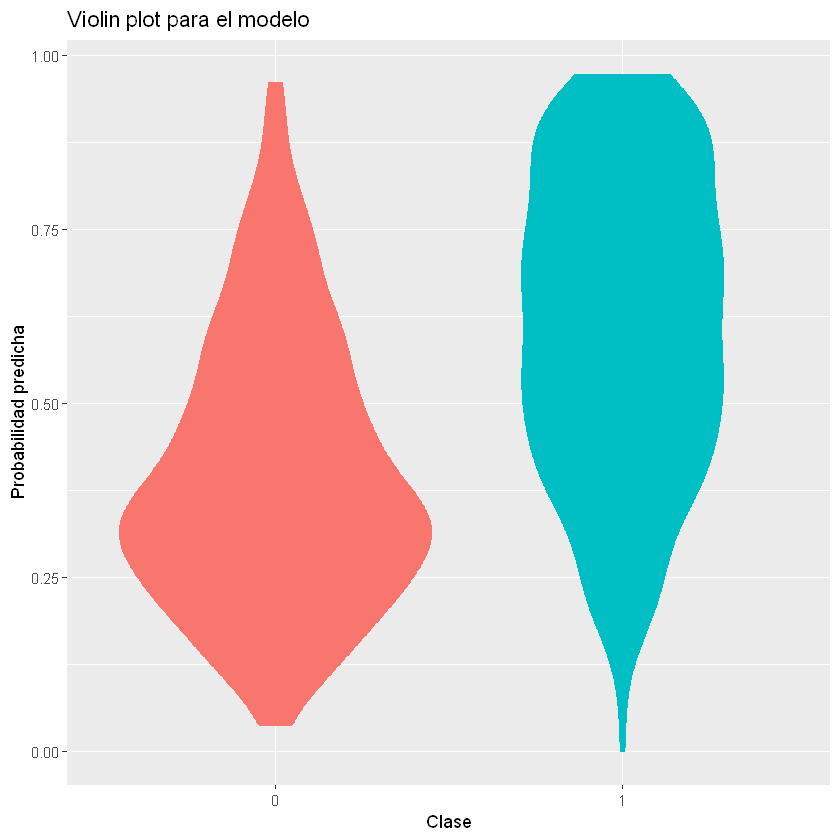

In [54]:
ggplot(test_values, aes(x = y_real, y = y_pred, group = y_real, fill = factor(y_real), color = factor(y_real))) + 
        theme_grey() + theme(legend.position = "none") +
        geom_violin() + 
        labs(title = 'Violin plot para el modelo', y = 'Probabilidad predicha', x = "Clase")

In [55]:
write_csv(test_values, paste0(path_results,"test_bal_dummy_pred.csv"))
write_csv(val_values1, paste0(path_results,"val_bal_dummy_pred1.csv"))
write_csv(val_values2, paste0(path_results,"val_bal_dummy_pred2.csv"))
write_csv(val_values3, paste0(path_results,"val_bal_dummy_pred3.csv"))
write_csv(val_values4, paste0(path_results,"val_bal_dummy_pred4.csv"))
write_csv(val_values5, paste0(path_results,"val_bal_dummy_pred5.csv"))